## imports

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from os.path import join as pjoin
from tqdm import tqdm
import os

In [2]:
import meshpy.triangle as tri
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import find_contours

## FlowMesh

## bubles article

In [190]:
def f(w):
    k_0 = 1
    res = np.zeros_like(w)
    print(w.shape, res.shape)
    res[w <= 1.5] = k_0 * (1.25*w[w <= 1.5]**3 - 2.375*w[w <= 1.5]**2 + 1.125)
    return res
    

(200,) (200,)


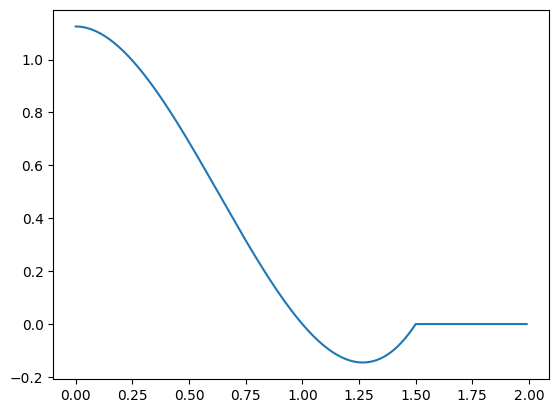

In [193]:
plt.plot(np.arange(0,2,0.01), f(np.arange(0,2,0.01)))
plt.show()

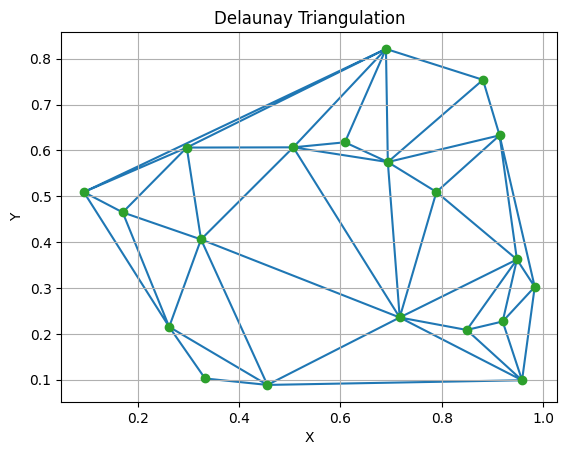

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Generate some random points as an example
num_points = 20
points = np.random.rand(num_points, 2)

# Perform Delaunay triangulation
tri = Delaunay(points)

# Plot the triangulation
plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.plot(points[:, 0], points[:, 1], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation')
plt.grid(True)
plt.show()


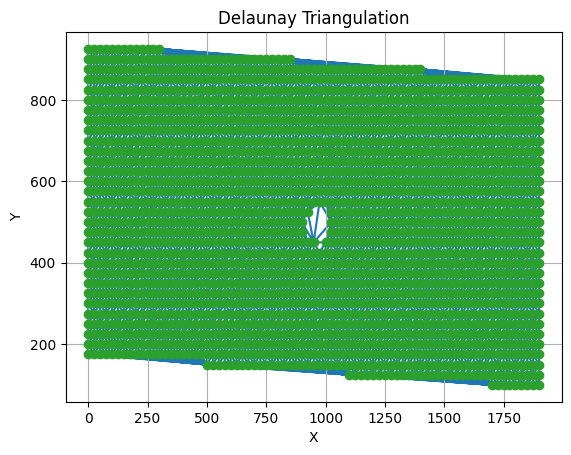

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Generate some random points as an example

points = nodes_for_ilsur.reshape(-1, 2)

# Perform Delaunay triangulation
tri = Delaunay(points)

# Plot the triangulation
plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.plot(points[:, 0], points[:, 1], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation')
plt.grid(True)
plt.show()


In [ ]:
 = np.array(nodes_for_ilsur)

Если ребро пересекает дырку (нужны ли ещё доп условия???), тогда удаляем ребро

## creating nodes and mesh

In [88]:
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def repulsive_force(p1, p2):
    dist = distance(p1, p2)
    if dist == 0:
        return 0
    return 1 / dist

def simulate_npbs(points, iterations=1000, step_size=0.01):
    new_points = points.copy()
    for _ in tqdm(range(iterations)):
        for i in range(len(points)):
            force = np.zeros(2)
            for j in range(len(points)):
                if i != j:
                    force += repulsive_force(points[i], points[j]) * (points[i] - points[j])
            new_points[i] += step_size * force
    return new_points

In [99]:
# Define the domain size and number of nodes
domain_size = [10, 10]
num_nodes = 100

# Generate random initial node positions within the domain
nodes = np.random.rand(num_nodes, 2) * domain_size

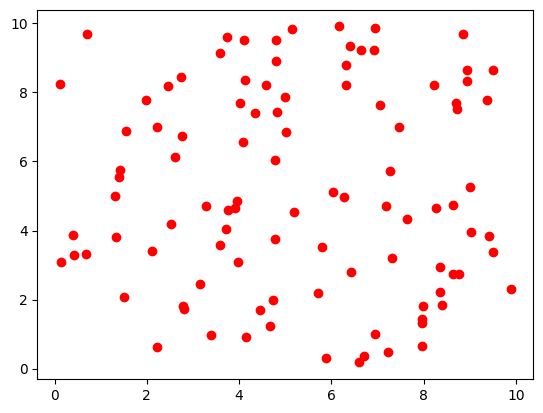

In [100]:
plt.plot(nodes[:,0],nodes[:,1], 'ro')
plt.show()

In [91]:
# Perform NPBS simulation to optimize node positions
optimized_nodes = simulate_npbs(nodes)

100%|██████████| 1000/1000 [00:55<00:00, 17.99it/s]


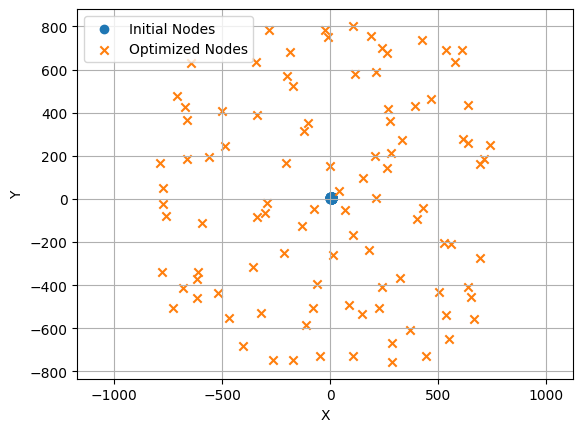

In [92]:
# Visualize the results
plt.scatter(nodes[:, 0], nodes[:, 1], label='Initial Nodes')
plt.scatter(optimized_nodes[:, 0], optimized_nodes[:, 1], label='Optimized Nodes', marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## our object

In [63]:
# Загрузка изображения силуэта объекта
image = io.imread(pjoin('images','frame_0_mask.png'))

# Преобразование изображения в бинарное
binary_image = image[:, :, 0] > 0

### simple mesh

In [64]:
h, w = image.shape[:2]

In [65]:
x_mash_step, y_mash_step = 40, 40

In [66]:
y_mash = np.arange(0, h, y_mash_step)
x_mash = np.arange(0, w, x_mash_step)

In [67]:
_s = np.load(pjoin('actual pos','all_pos_vals.npy'))

In [68]:
_s[0] # (x, y)

array([[9.93198395e-01, 9.60201454e+00],
       [1.01012421e+00, 2.59780769e+01],
       [1.01922035e+00, 4.20226517e+01],
       ...,
       [2.15700000e+03, 7.61000000e+02],
       [2.15700000e+03, 7.77000000e+02],
       [2.15700000e+03, 7.93000000e+02]])

In [69]:
xy_mesh = np.meshgrid(x_mash, y_mash)

In [70]:
nodes = np.dstack([xy_mesh[0].T, xy_mesh[1].T]).reshape(-1, 2)

In [71]:
binary_image.shape

(1080, 1920)

In [72]:
binary_image[nodes[0][0], nodes[0][1]]

False

In [73]:
nodes_for_ilsur = list()

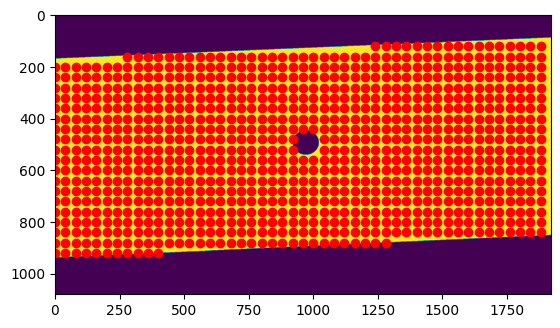

In [74]:
for node in nodes:
    if binary_image[node[1], node[0]]:
        nodes_for_ilsur.append((node[0], node[1]))
        plt.plot(node[0], node[1], 'ro')
plt.imshow(binary_image)
plt.show()

In [75]:
nodes_for_ilsur = np.array(nodes_for_ilsur)

In [76]:
nodes_for_ilsur = nodes_for_ilsur.reshape(-1,1,2)

In [77]:
np.save('nodes_for_ilsur.npy', nodes_for_ilsur)

### triangular

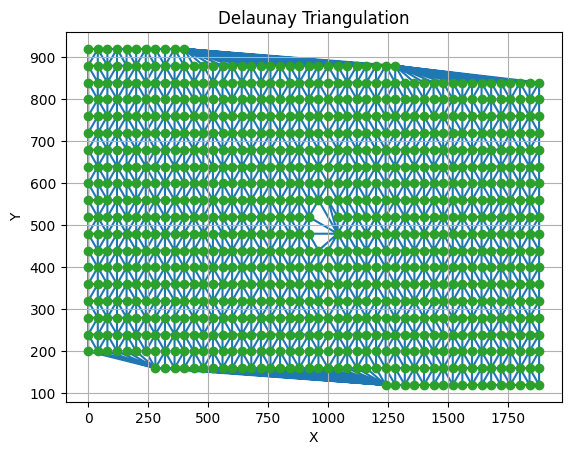

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Generate some random points as an example

points = nodes_for_ilsur.reshape(-1, 2)

# Perform Delaunay triangulation
tri = Delaunay(points)

# Plot the triangulation
plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.plot(points[:, 0], points[:, 1], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation')
plt.grid(True)
plt.show()

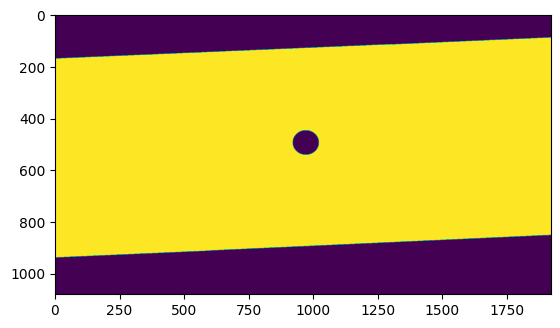

In [79]:
plt.imshow(binary_image)
plt.show()

In [80]:
pad_size = 10

[]

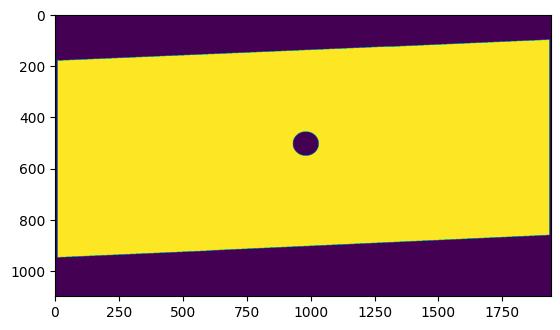

In [81]:
plt.imshow(np.pad(binary_image,pad_size))
plt.plot()

In [82]:
# Нахождение контура объекта
contours = find_contours(np.pad(binary_image,pad_size), 0.5)

In [83]:
frame_0 = cv2.imread(pjoin('images','frame_0.png'))

In [84]:
np.pad(frame_0, ((pad_size, pad_size), (pad_size, pad_size), (0,0))).shape

(1100, 1940, 3)

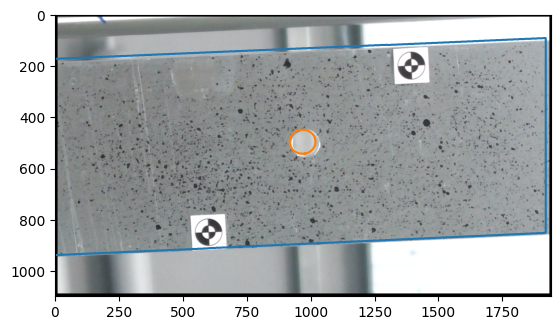

In [109]:
plt.imshow(np.pad(frame_0, ((pad_size, pad_size), (pad_size, pad_size), (0,0))))
for c in contours:
    plt.plot(c[::4,1],c[::4,0])
plt.show()

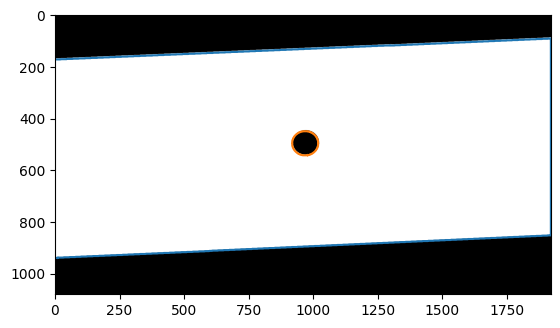

In [86]:
plt.imshow(image)
for c in contours:
    plt.plot(c[:,1]-pad_size,c[:,0]-pad_size)
plt.show()

In [87]:
moved_contours = contours.copy()

In [88]:
for i, c in enumerate(moved_contours):
    contours[i] = c - pad_size

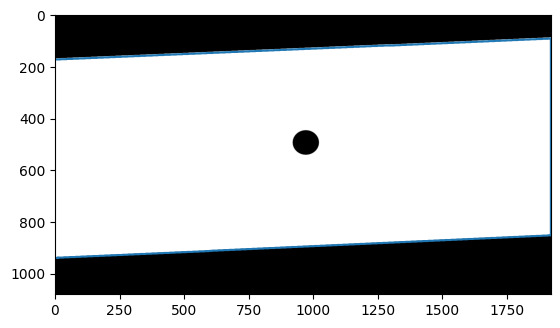

In [89]:
plt.imshow(image)
# for c in contours:
plt.plot(contours[0][:,1],contours[0][:,0])
plt.show()

In [90]:
px_diam = 106.
mm_diam = 10.

In [91]:
mm_contours = contours.copy()

In [92]:
for i, c in enumerate(contours):
    mm_contours[i] = c / 10.6

In [93]:
import pandas as pd

In [96]:
mm_contours[0][:,::-1]

array([[ 0.94339623, 88.53773585],
       [ 0.8490566 , 88.53773585],
       [ 0.75471698, 88.53773585],
       ...,
       [ 1.03773585, 88.44339623],
       [ 0.99056604, 88.49056604],
       [ 0.94339623, 88.53773585]])

In [97]:
pd.DataFrame(mm_contours[0][:,::-1]).to_csv('out_contour_rot.txt', index=False, header=False)

In [98]:
pd.DataFrame(mm_contours[1][:,::-1]).to_csv('in_contour_rot.txt', index=False, header=False)

In [51]:
# Выделение контура объекта
object_contour = contours[0]

# Создание неравномерной сетки с адаптивной плотностью узлов на границе объекта
mesh_info = tri.MeshInfo()
mesh_info.set_points(object_contour)
mesh_info.set_holes(contours[1])  # Если есть отверстия внутри объекта, их также можно указать
mesh = tri.build(mesh_info, refinement_func='mean_ratio')

In [53]:
print("Mesh Points:")
for i, p in enumerate(mesh.points):
    print(i, p)
print("Point numbers in tetrahedra:")
for i, t in enumerate(mesh.elements):
    print(i, t)
# mesh.write_vtk("test.vtk")

Mesh Points:
Point numbers in tetrahedra:


In [56]:
contours[0]

array([[938.5,  10. ],
       [938.5,   9. ],
       [938.5,   8. ],
       ...,
       [937.5,  11. ],
       [938. ,  10.5],
       [938.5,  10. ]])

In [ ]:
# nodes[:,0],nodes[:,1]

In [101]:
# Create an empty list to store the vertices
vertices = []

# Convert the contour coordinates to vertices
for contour in contours:
    for point in contour:
        vertices.append([point[0], point[1]])


In [103]:
vertices_np = np.array(vertices)

In [105]:
import pymesh2

In [108]:
tri = pymesh2.triangle()
tri.points = vertices_np
tri.max_area = 1000
tri.split_boundary = False
tri.verbosity = 0
tri.run(); # Execute triangle.
mesh = tri.mesh; # output triangulation.

AttributeError: module 'pymesh' has no attribute 'triangle'

In [62]:
# Create a mesh using meshpy
mesh_info = tri.MeshInfo()
mesh_info.set_points(vertices)
mesh = tri.build(mesh_info)

# Access the mesh vertices and triangles
mesh_vertices = mesh.points
mesh_triangles = mesh.elements

# Perform further operations with the mesh...

3

In [58]:
# Visualize the mesh
plt.triplot(mesh.points[:, 0], mesh.points[:, 1], mesh.elements)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

RuntimeError: Unable to cast Python instance to C++ type (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

RuntimeError: Unable to cast Python instance to C++ type (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

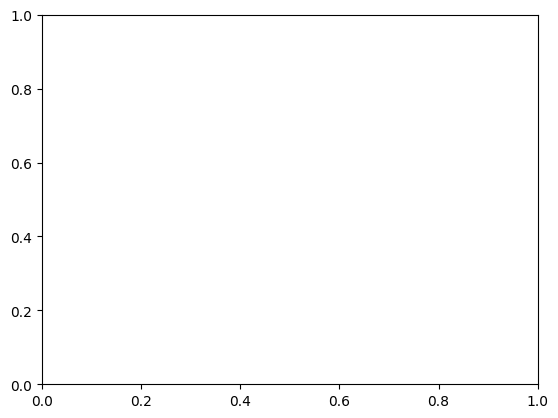

In [41]:
# Визуализация сетки
fig, ax = plt.subplots()
ax.tripcolor(mesh.points[:, 0], mesh.points[:, 1], mesh.elements,
             facecolors='none', edgecolors='black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Неравномерная сетка объекта')
plt.show()

In [8]:
mesh.elements

## load dat files

In [111]:
import re

In [3]:
from dat_reader import read_connectivity_table, read_coordinates_table

In [11]:
filename = pjoin('dat files', 'squre_mesh.dat')

In [12]:
conn_table = read_connectivity_table(filename)
print(conn_table)

[[1, 38, 39, 287, 37], [2, 39, 40, 288, 287], [3, 40, 41, 289, 288], [4, 41, 42, 290, 289], [5, 42, 43, 291, 290], [6, 43, 44, 292, 291], [7, 44, 45, 293, 292], [8, 45, 46, 294, 293], [9, 46, 47, 295, 294], [10, 166, 167, 296, 165], [11, 167, 168, 297, 296], [12, 168, 169, 298, 297], [13, 169, 170, 299, 298], [14, 170, 171, 300, 299], [15, 171, 172, 301, 300], [16, 172, 173, 302, 301], [17, 173, 174, 303, 302], [18, 164, 165, 296, 304], [19, 163, 164, 304, 305], [20, 162, 163, 305, 306], [21, 161, 162, 306, 307], [22, 160, 161, 307, 308], [23, 159, 160, 308, 309], [24, 158, 159, 309, 310], [25, 157, 158, 310, 311], [26, 156, 157, 311, 312], [27, 155, 156, 312, 313], [28, 154, 155, 313, 314], [29, 153, 154, 314, 315], [30, 152, 153, 315, 316], [31, 151, 152, 316, 317], [32, 150, 151, 317, 318], [33, 149, 150, 318, 319], [34, 148, 149, 319, 320], [35, 147, 148, 320, 321], [36, 146, 147, 321, 322], [37, 145, 146, 322, 323], [38, 144, 145, 323, 324], [39, 143, 144, 324, 325], [40, 142, 143

In [13]:
# Example usage:
node_num, conn_table = read_coordinates_table(filename)
print(node_num)
print(conn_table)

4027
[[1, 1.989450549450549, 80.41967032967031, 0.0], [2, 0.0, 80.32999999999998, 0.0], [3, -0.0008333333333334155, 78.33319444444432, 0.0], [4, -0.001666666666666774, 76.3363888888888, 0.0], [5, -0.002500000000000133, 74.33958333333324, 0.0], [6, -0.003333333333333498, 72.34277777777768, 0.0], [7, -0.004166666666666857, 70.34597222222216, 0.0], [8, -0.005000000000000216, 68.34916666666662, 0.0], [9, -0.005833333333333574, 66.35236111111107, 0.0], [10, -0.006666666666666938, 64.3555555555555, 0.0], [11, -0.007500000000000304, 62.35874999999996, 0.0], [12, -0.00833333333333367, 60.3619444444444, 0.0], [13, -0.009166666666667033, 58.36513888888884, 0.0], [14, -0.0100000000000004, 56.3683333333333, 0.0], [15, -0.01083333333333376, 54.37152777777774, 0.0], [16, -0.01166666666666712, 52.3747222222222, 0.0], [17, -0.01250000000000049, 50.37791666666664, 0.0], [18, -0.01333333333333386, 48.38111111111108, 0.0], [19, -0.01416666666666722, 46.38430555555552, 0.0], [20, -0.01500000000000058, 44.